In [ ]:
import random
from PIL import Image

In [ ]:
class Space():

    def __init__(self, height, width, num_hospitals):
        """Create a new state space with given dimensions."""
        self.height = height
        self.width = width
        self.num_hospitals = num_hospitals
        self.houses = set()
        self.hospitals = set()

    def add_house(self, row, col):
        """Add a house at a particular location in state space."""
        self.houses.add((row, col))

    def available_spaces(self):
        """Returns all cells not currently used by a house or hospital."""

        # Consider all possible cells
        candidates = set(
            (row, col)
            for row in range(self.height)
            for col in range(self.width)
        )

        # Remove all houses and hospitals
        for house in self.houses:
            candidates.remove(house)
        for hospital in self.hospitals:
            candidates.remove(hospital)
        return candidates

    def hill_climb(self, maximum=None, image_prefix=None, log=False):
        """Performs hill-climbing to find a solution."""
        count = 0

        # Start by initializing hospitals randomly
        self.hospitals = set()
        for i in range(self.num_hospitals):
            self.hospitals.add(random.choice(list(self.available_spaces())))
        if log:
            print("Initial state: cost", self.get_cost(self.hospitals))
        if image_prefix:
            self.output_image(f"{image_prefix}{str(count).zfill(3)}.png")

        # Continue until we reach maximum number of iterations
        while maximum is None or count < maximum:
            count += 1
            best_neighbors = []
            best_neighbor_cost = None

            # Consider all hospitals to move
            for hospital in self.hospitals:

                # Consider all neighbors for that hospital
                for replacement in self.get_neighbors(*hospital):

                    # Generate a neighboring set of hospitals
                    neighbor = self.hospitals.copy()
                    neighbor.remove(hospital)
                    neighbor.add(replacement)

                    # Check if neighbor is best so far
                    cost = self.get_cost(neighbor)
                    if best_neighbor_cost is None or cost < best_neighbor_cost:
                        best_neighbor_cost = cost
                        best_neighbors = [neighbor]
                    elif best_neighbor_cost == cost:
                        best_neighbors.append(neighbor)

            # None of the neighbors are better than the current state
            if best_neighbor_cost >= self.get_cost(self.hospitals):
                return self.hospitals

            # Move to a highest-valued neighbor
            else:
                if log:
                    print(f"Found better neighbor: cost {best_neighbor_cost}")
                self.hospitals = random.choice(best_neighbors)

            # Generate image
            if image_prefix:
                self.output_image(f"{image_prefix}{str(count).zfill(3)}.png")

    def random_restart(self, maximum, image_prefix=None, log=False):
        """Repeats hill-climbing multiple times."""
        best_hospitals = None
        best_cost = None

        # Repeat hill-climbing a fixed number of times
        for i in range(maximum):
            hospitals = self.hill_climb()
            cost = self.get_cost(hospitals)
            if best_cost is None or cost < best_cost:
                best_cost = cost
                best_hospitals = hospitals
                if log:
                    print(f"{i}: Found new best state: cost {cost}")
            else:
                if log:
                    print(f"{i}: Found state: cost {cost}")

            if image_prefix:
                self.output_image(f"{image_prefix}{str(i).zfill(3)}.png")

        return best_hospitals

    def get_cost(self, hospitals):
        """Calculates sum of distances from houses to nearest hospital."""
        cost = 0
        for house in self.houses:
            cost += min(
                abs(house[0] - hospital[0]) + abs(house[1] - hospital[1])
                for hospital in hospitals
            )
        return cost

    def get_neighbors(self, row, col):
        """Returns neighbors not already containing a house or hospital."""
        candidates = [
            (row - 1, col),
            (row + 1, col),
            (row, col - 1),
            (row, col + 1)
        ]
        neighbors = []
        for r, c in candidates:
            if (r, c) in self.houses or (r, c) in self.hospitals:
                continue
            if 0 <= r < self.height and 0 <= c < self.width:
                neighbors.append((r, c))
        return neighbors

    def output_image(self, filename):
        """Generates image with all houses and hospitals."""
        from PIL import Image, ImageDraw, ImageFont
        cell_size = 100
        cell_border = 2
        cost_size = 40
        padding = 10

        # Create a blank canvas
        img = Image.new(
            "RGBA",
            (self.width * cell_size,
             self.height * cell_size + cost_size + padding * 2),
            "white"
        )
        house = Image.open("assets/images/House.png").resize(
            (cell_size, cell_size)
        )
        hospital = Image.open("assets/images/Hospital.png").resize(
            (cell_size, cell_size)
        )
        font = ImageFont.truetype("assets/fonts/OpenSans-Regular.ttf", 30)
        draw = ImageDraw.Draw(img)

        for i in range(self.height):
            for j in range(self.width):

                # Draw cell
                rect = [
                    (j * cell_size + cell_border,
                     i * cell_size + cell_border),
                    ((j + 1) * cell_size - cell_border,
                     (i + 1) * cell_size - cell_border)
                ]
                draw.rectangle(rect, fill="black")

                if (i, j) in self.houses:
                    img.paste(house, rect[0], house)
                if (i, j) in self.hospitals:
                    img.paste(hospital, rect[0], hospital)

        # Add cost
        draw.rectangle(
            (0, self.height * cell_size, self.width * cell_size,
             self.height * cell_size + cost_size + padding * 2),
            "black"
        )
        draw.text(
            (padding, self.height * cell_size + padding),
            f"Cost: {self.get_cost(self.hospitals)}",
            fill="white",
            font=font
        )

        img.save(filename)

In [ ]:
# Create a new space and add houses randomly
s = Space(height=10, width=20, num_hospitals=3)
for i in range(15):
    s.add_house(random.randrange(s.height), random.randrange(s.width))

# Use local search to determine hospital placement
hospitals = s.hill_climb(image_prefix="hospitals", log=True)

Initial state: cost 81
Found better neighbor: cost 75
Found better neighbor: cost 69
Found better neighbor: cost 65
Found better neighbor: cost 61
Found better neighbor: cost 58
Found better neighbor: cost 56


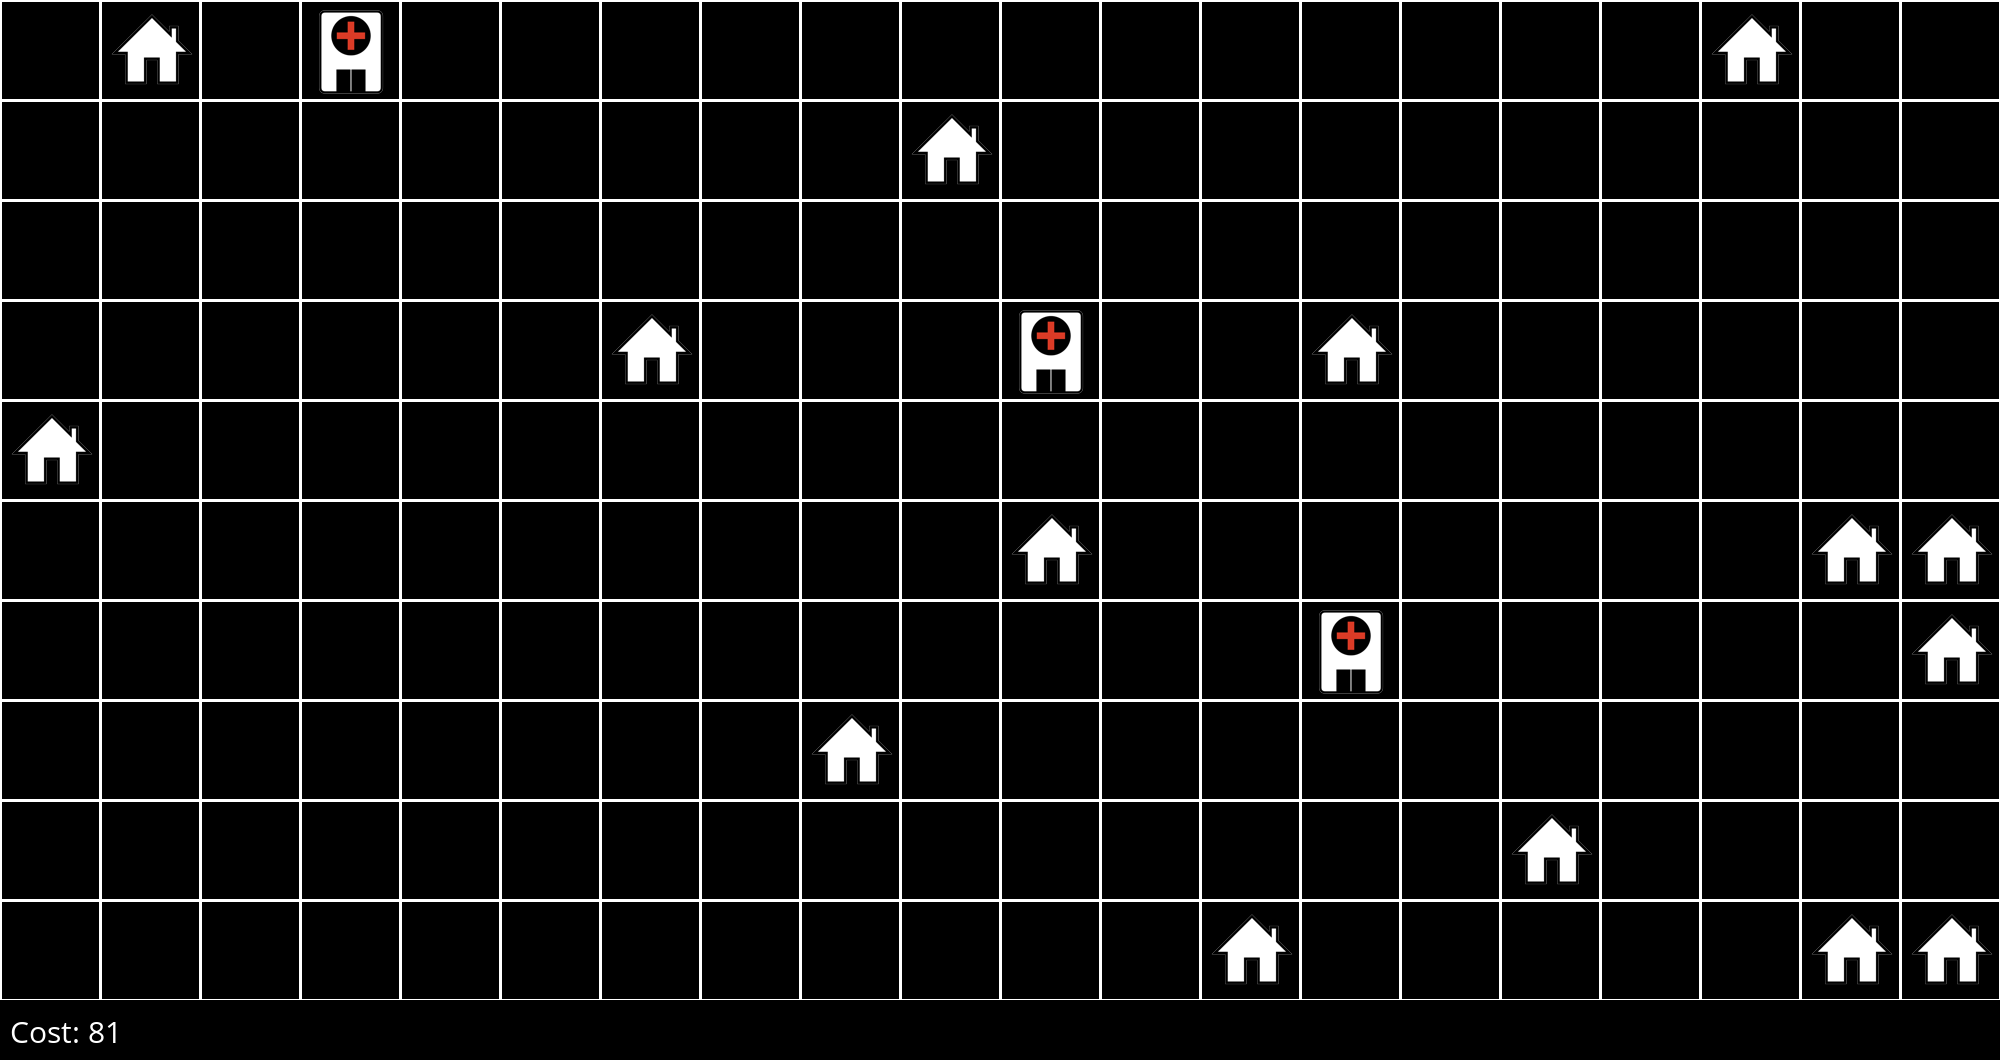

In [ ]:
"""# initial state
Image.open('hospitals000.png')"""

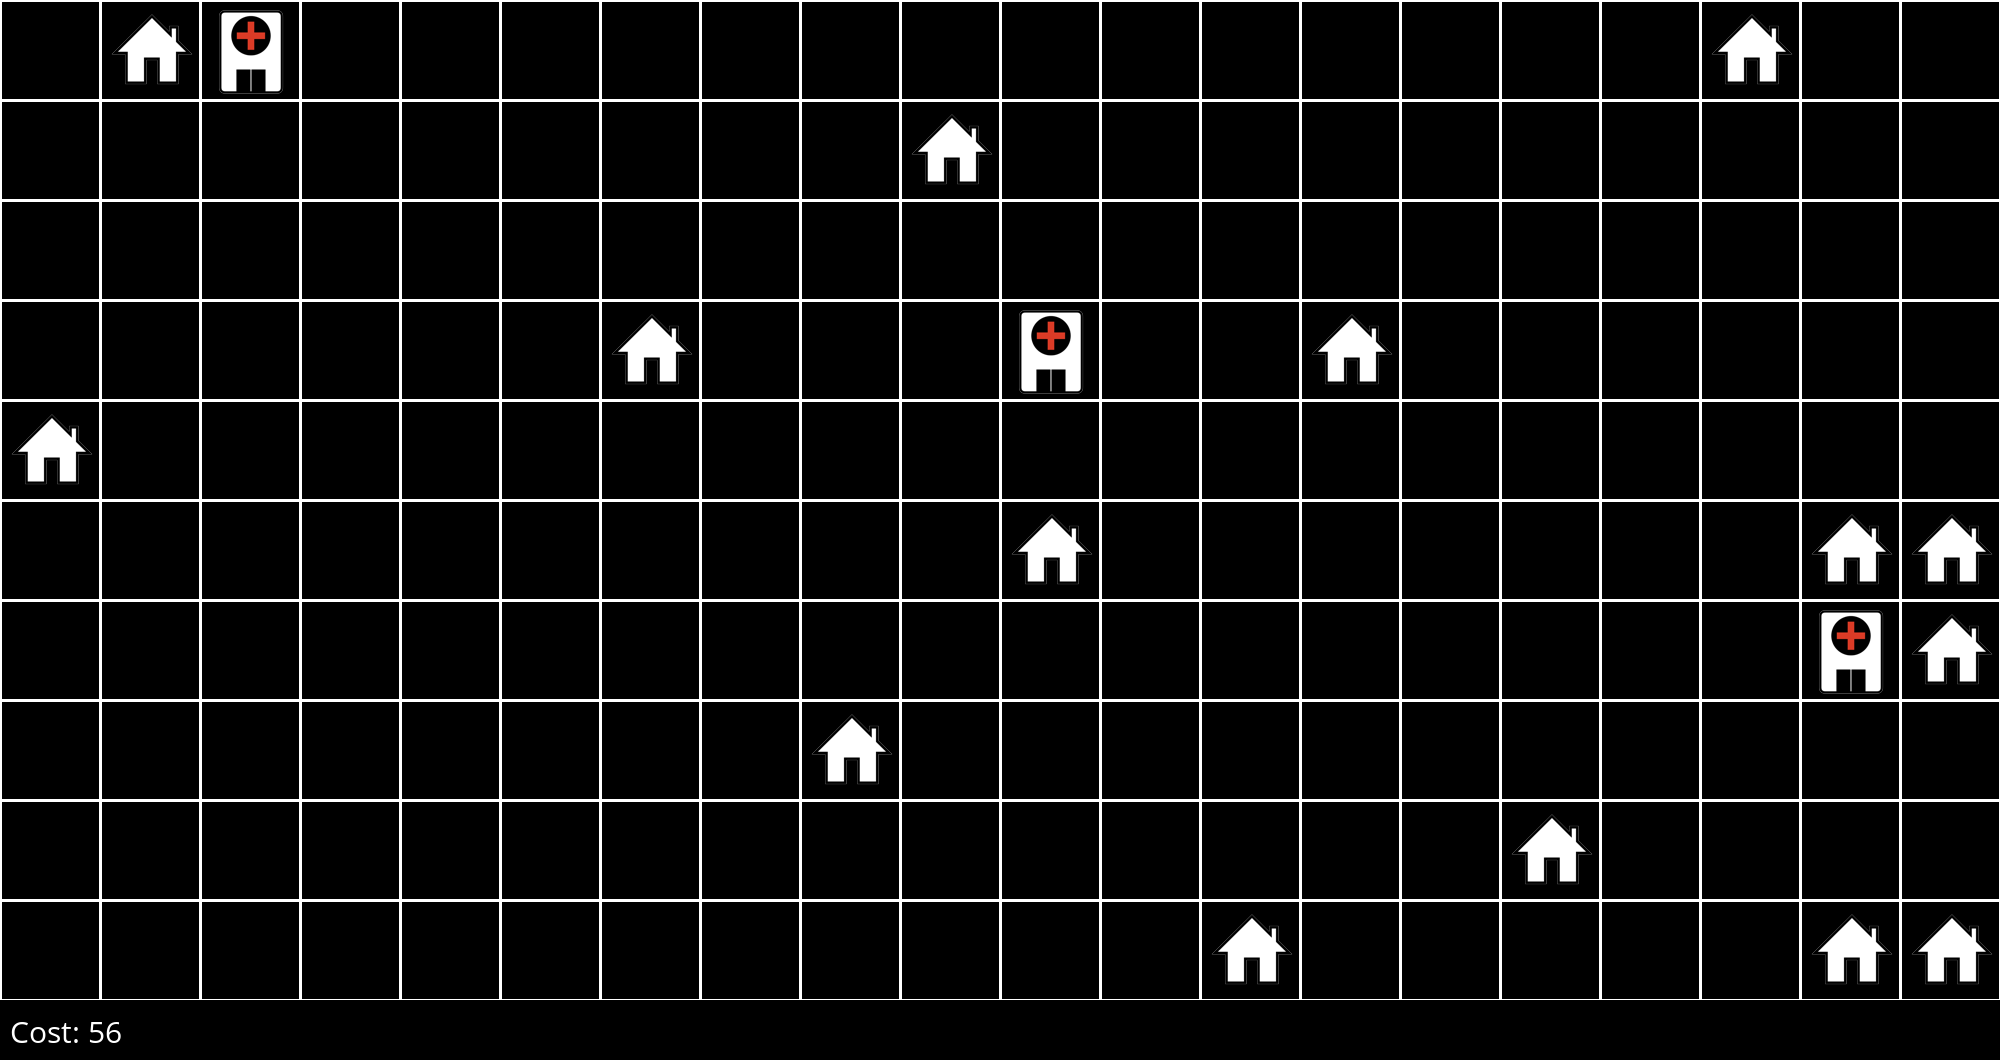

In [ ]:
"""# final optimized state
Image.open('hospitals006.png')"""